Proyecto Individual - Análisis Exploratorio de Datos

Objetivo:
Aplicar técnicas de Análisis Exploratorio de Datos (EDA) con Pandas y visualizar los resultados con Matplotlib.
Mandato del Proyecto:
1. Descargar un dataset real desde Kaggle o algún repositorio abierto.
2. Cargar los datos en un DataFrame de Pandas y realizar un análisis exploratorio:
- Inspección inicial de los datos (info(), describe()).
- Identificación y tratamiento de valores nulos y duplicados.
- Análisis de tendencias y distribución de los datos.
3. Crear visualizaciones con Matplotlib para interpretar los datos:
- Histogramas para distribución de variables numéricas.
- Diagramas de dispersión para identificar correlaciones.
- Gráficos de barras para análisis de variables categóricas.
4. Presentar los hallazgos en un informe o presentación.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

file = pd.read_csv("crime_vs_socioeconomic_factors.csv", nrows=100)

df = pd.DataFrame(file)

#EDA
print(df.head(15))

df.info()

       Region  Crime_Rate  Education_Level  Employment_Rate  Median_Income  \
0    Region_1        1176        76.492001        73.315344         116664   
1    Region_2         910        85.361505        46.088096          21401   
2    Region_2         910        85.361505        46.088096          21401   
3    Region_3        1344        88.388975        63.911701         105179   
4    Region_4        1180        54.364509              NaN          35193   
5    Region_5        1145        75.305198        51.627568         112389   
6    Region_6        1094        96.600717        43.998270          64864   
7    Region_7         171        66.032110        78.836182          40307   
8    Region_8         516        79.694155        46.101753          39611   
9    Region_9        1288        68.461524        69.714538          63791   
10  Region_10         380        72.713399              NaN          31950   
11  Region_11         137        77.430156        83.805260     

In [20]:
#Descripcion estadistica

df.describe()

,Crime_Rate,Education_Level,Employment_Rate,Median_Income,Poverty_Rate,Population_Density
count,100.000000,97.000000,85.000000,100.00000,91.000000,100.000000
mean,789.180000,76.408739,63.584399,68629.20000,18.597557,2544.830000
std,413.453755,12.977155,13.945948,28100.13515,6.938746,1355.654116
min,63.000000,50.135545,40.016625,21401.00000,5.133654,78.000000
25%,433.500000,67.126213,51.040131,46059.25000,14.382670,1499.750000
50%,825.500000,77.142466,63.911701,69248.00000,19.471004,2737.500000
75%,1135.250000,86.527457,74.048741,94340.25000,24.380663,3593.750000
max,1487.000000,99.884631,88.191114,118934.00000,29.582641,4923.000000


In [21]:
#Impresion valores nulos

df = pd.DataFrame(file)

print("Valores nulos:\n", df.isnull().sum())

Valores nulos:
 Region                 0
Crime_Rate             0
Education_Level        3
Employment_Rate       15
Median_Income          0
Poverty_Rate           9
Population_Density     0
dtype: int64


In [22]:
#Valores duplicados

print("\n Estas son las filas que pudieran estar duplicadas: \n")

duplicates = df.duplicated()

print(df[duplicates])

print("\n En este archivo hay un total de", df.duplicated().sum(), "registros duplicados.")


 Estas son las filas que pudieran estar duplicadas: 

       Region  Crime_Rate  Education_Level  Employment_Rate  Median_Income  \
2    Region_2         910        85.361505        46.088096          21401   
14  Region_13        1173        60.086523        82.572432          22745   
23  Region_21         435        89.714472        50.587768         101029   
43  Region_40        1007        81.687928        82.400794          76547   

    Poverty_Rate  Population_Density  
2      19.712623                3293  
14     16.269407                 273  
23     18.218110                3783  
43     27.211603                3415  

 En este archivo hay un total de 4 registros duplicados.


In [23]:
#Eliminar filas duplicadas

print("Se han eliminado los registros duplicados, manteniendo la primera ocurrencia \n")

df_sin_duplicados = df.drop_duplicates()
print(df_sin_duplicados)

Se han eliminado los registros duplicados, manteniendo la primera ocurrencia 

       Region  Crime_Rate  Education_Level  Employment_Rate  Median_Income  \
0    Region_1        1176        76.492001        73.315344         116664   
1    Region_2         910        85.361505        46.088096          21401   
3    Region_3        1344        88.388975        63.911701         105179   
4    Region_4        1180        54.364509              NaN          35193   
5    Region_5        1145        75.305198        51.627568         112389   
..        ...         ...              ...              ...            ...   
95  Region_92         266        97.953740        59.317445          52430   
96  Region_93         813        67.126213        62.506222          43091   
97  Region_94         237        61.367549        51.348235          52983   
98  Region_95         429        71.179843              NaN          43989   
99  Region_96         542        64.396481        62.530983    

In [24]:
##Tratamiento de valores nulos

#insertar media en valores nulos
df["Education_Level"].fillna(df["Education_Level"].mean(), inplace=True)

#llenar con el valor anterior no nulo
df['Poverty_Rate'].fillna(df["Poverty_Rate"].mean(), inplace=True)

#llenar con la mediana
df["Employment_Rate"].fillna(df["Employment_Rate"].mean(), inplace=True)


print("Valores nulos:\n", df.isnull().sum())

Valores nulos:
 Region                0
Crime_Rate            0
Education_Level       0
Employment_Rate       0
Median_Income         0
Poverty_Rate          0
Population_Density    0
dtype: int64


C:\Users\aylin\AppData\Local\Temp\ipykernel_17948\1651340060.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Education_Level"].fillna(df["Education_Level"].mean(), inplace=True)
C:\Users\aylin\AppData\Local\Temp\ipykernel_17948\1651340060.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

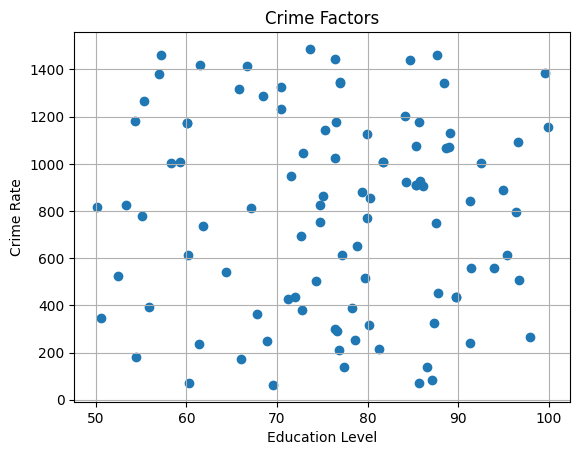

In [25]:
#Scatter plot Education Level vs Crime Rate

x = df["Education_Level"]
y = df["Crime_Rate"]

plt.title("Crime Factors")
plt.xlabel("Education Level")
plt.ylabel("Crime Rate")
plt.grid()
plt.scatter(x,y)

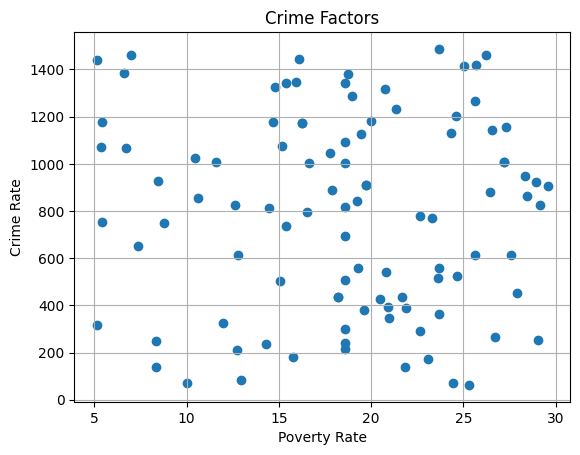

In [26]:
#Scatter plot Poverty Rate vs Crime Rate

x = df["Poverty_Rate"]
y = df["Crime_Rate"]

plt.title("Crime Factors")
plt.xlabel("Poverty Rate")
plt.ylabel("Crime Rate")
plt.grid()
plt.scatter(x,y)

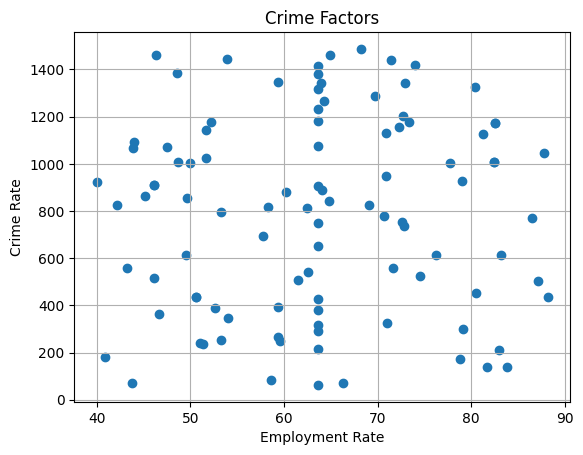

In [27]:
#Scatter plot Employment Rate vs Crime Rate

x = df["Employment_Rate"]
y = df["Crime_Rate"]

plt.title("Crime Factors")
plt.xlabel("Employment Rate")
plt.ylabel("Crime Rate")
plt.grid()
plt.scatter(x,y)

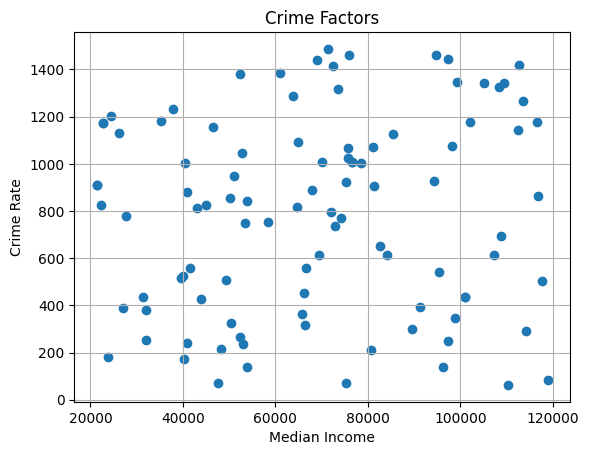

In [28]:
#Scatter plot Median Income vs Crime Rate

x = df["Median_Income"]
y = df["Crime_Rate"]

plt.title("Crime Factors")
plt.xlabel("Median Income")
plt.ylabel("Crime Rate")
plt.grid()
plt.scatter(x,y)

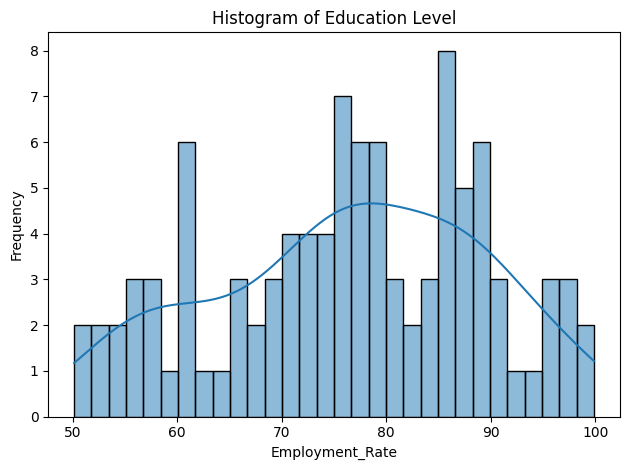

In [29]:
#Histogram for Education Level

plt.figure()
sns.histplot(df['Education_Level'], kde=True, bins=30)
plt.title('Histogram of Education Level')
plt.xlabel('Employment_Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

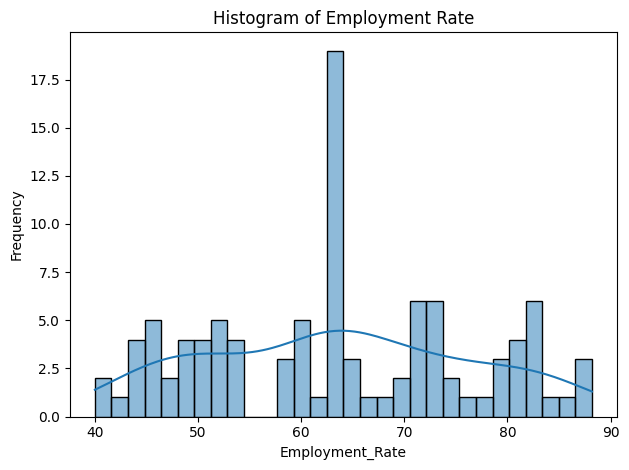

In [30]:
#Histogram for Employment Rate

plt.figure()
sns.histplot(df['Employment_Rate'], kde=True, bins=30)
plt.title('Histogram of Employment Rate')
plt.xlabel('Employment_Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

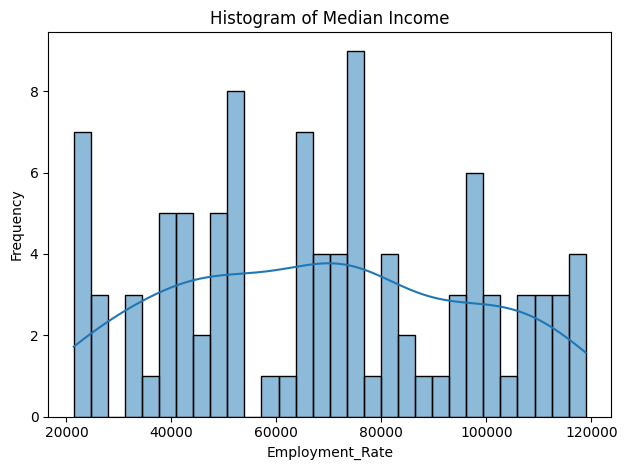

In [31]:
#Histogram for Median Income

plt.figure()
sns.histplot(df['Median_Income'], kde=True, bins=30)
plt.title('Histogram of Median Income')
plt.xlabel('Employment_Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

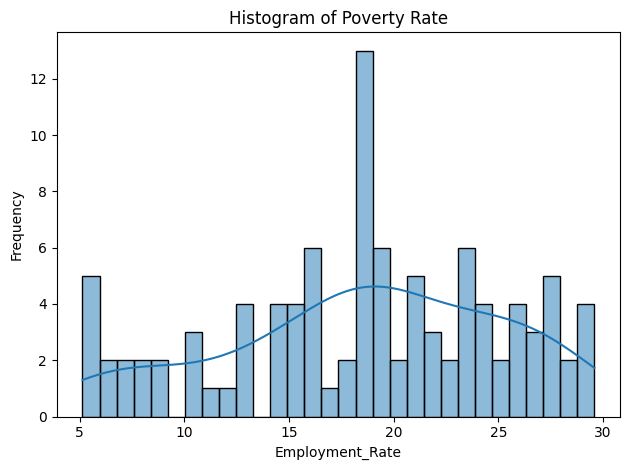

In [32]:
#Histogram for Poverty Rate

plt.figure()
sns.histplot(df['Poverty_Rate'], kde=True, bins=30)
plt.title('Histogram of Poverty Rate')
plt.xlabel('Employment_Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

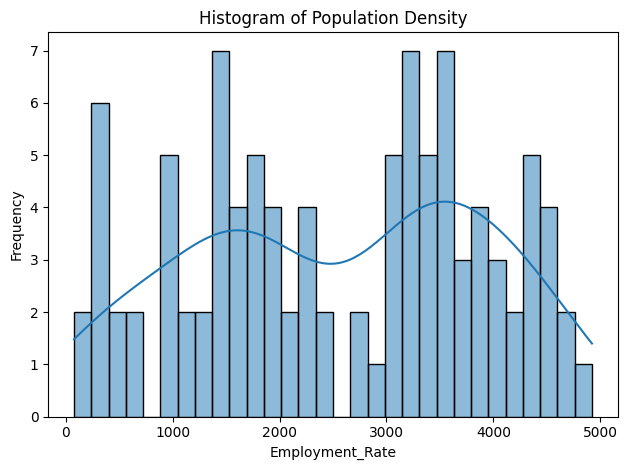

In [33]:
#Histogram for Population Density

plt.figure()
sns.histplot(df['Population_Density'], kde=True, bins=30)
plt.title('Histogram of Population Density')
plt.xlabel('Employment_Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

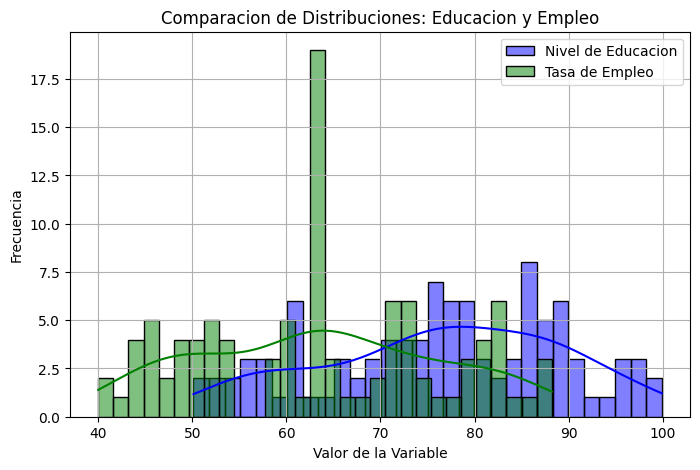

In [34]:
#Histograma de las tres variables con diferentes colores

plt.figure(figsize=(8, 5))

sns.histplot(df["Education_Level"], bins=30, color="blue", label="Nivel de Educacion", kde=True, alpha=0.5)
sns.histplot(df["Employment_Rate"], bins=30, color="green", label="Tasa de Empleo", kde=True, alpha=0.5)


plt.title("Comparacion de Distribuciones: Educacion y Empleo")
plt.xlabel("Valor de la Variable")
plt.ylabel("Frecuencia")
plt.legend()  #Muestra la leyenda con etiquetas
plt.grid(True)  #Para mejor visualizacion

plt.show()

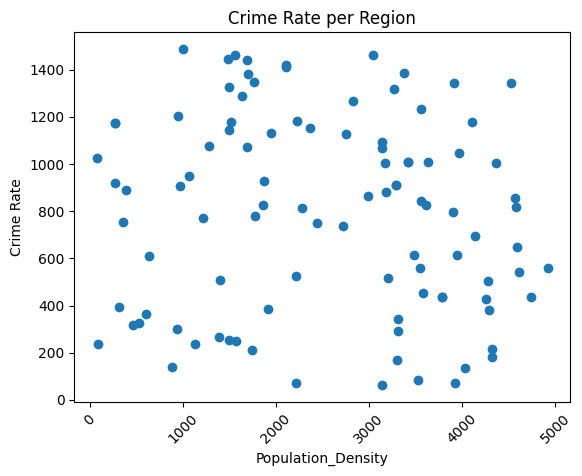

In [35]:
x = df["Population_Density"]
y = df["Crime_Rate"]

plt.title("Crime Rate per Region")
plt.xlabel("Population_Density")
plt.ylabel("Crime Rate")
plt.scatter(x, y)
plt.xticks(rotation=45) 
plt.show()